In [163]:
import allpoetryapi
from datetime import datetime
import pickle
import random
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import os
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib notebook

Add your [allpoetry.com](allpoetry.com) credentials here:

In [3]:
username, password = "USERNAME", "PASSWORD"
api = allpoetryapi.AllPoetry(username, password)

# Fetch a specific poem 

We can get a specific poem if we know it's URL. This will get the poem text and some metadata.

In [4]:
url = "https://allpoetry.com/Poem/13570755-two-forms-of-water-by-Millie-Hughes"
poem = api.get_poem_by_url(url, fetch_comments=True)

The poem itself is saved:

In [5]:
print(poem)

two forms of water by Millie_Hughes
----------------------------------------
curtains of raindrops
coming down in rhythms
water washing the waste away
making my scene new

coursing down the windowpane
the same surface I rest my cheek upon
sluicing a way into my jumbled brain
washing me with the healing waters

of Autumn rain
warm at its onset
then cooler
till the trees

fold their bare arms
around their trunks
searching for warmth
dreading Winter's reign

when rain is quickly tranformed
into ice pellets
lashing out
clearcoating my world instantly


The metadata includes many things. Such as the comments:

In [6]:
poem.comments[0].text + " --" + poem.comments[0].user

'This was really interesting to read, Millie. I like the way you described the changing, and how you felt about it while watching. --Hope EB'

We can summarize how many comments and comment threads there are:

In [7]:
poem.num_comments(), poem.num_comment_threads()

(44, 23)

The metatdata includes how many times the poem was liked and viewed:

In [8]:
poem.count_like, poem.count_view

(30, 1100)

# Fetch a list of poems

First, we fetch the list of poems written by the user. 

In [9]:
poem_urls = api.get_user_poem_links("Millie_Hughes", at_least=100)

In [10]:
poem_urls

{'rest assured': 'https://allpoetry.com/poem/14058453-rest-assured-by-Millie-Hughes',
 "solitude's song": 'https://allpoetry.com/poem/14056464-solitudes-song-by-Millie-Hughes',
 "poetry's pulse": 'https://allpoetry.com/poem/14056413-poetrys-pulse-by-Millie-Hughes',
 'in the light of the truth': 'https://allpoetry.com/poem/14054778-in-the-light-of-the-truth-by-Millie-Hughes',
 'moonscape': 'https://allpoetry.com/poem/14051544-moonscape-by-Millie-Hughes',
 'death springs to life': 'https://allpoetry.com/poem/14051467-death-springs-to-life-by-Millie-Hughes',
 'let it begin with me': 'https://allpoetry.com/poem/14051416-let-it-begin-with-me-by-Millie-Hughes',
 'wooing her': 'https://allpoetry.com/poem/14048270-wooing-her-by-Millie-Hughes',
 'affirmation': 'https://allpoetry.com/poem/14043549-affirmation-by-Millie-Hughes',
 'dipped in the fount of faith': 'https://allpoetry.com/poem/14040458-dipped-in-the-fount-of-faith-by-Millie-Hughes',
 'sparrowsong': 'https://allpoetry.com/poem/14040434

Then, we can fetch the individual poems. We'll grab 10 at random from the list. 

In [11]:
selection = random.sample(list(poem_urls.keys()), 10)
poems = [api.get_poem_by_url(poem_urls[title], fetch_comments=True) for title in selection]

Then, we can look at information stored with the poems:

In [12]:
for poem in poems:
    print(poem.categories, len(poem))

['spiritual'] 86
['personal'] 55
['poetry'] 46
['poetry'] 65
['nature'] 27
['rhyme', 'misc'] 50
['humor'] 24
['sad', 'family', 'spiritual'] 118
['nature'] 78
['nature', 'humor'] 46


We can aggregate these results to understand what kinds of poems this author writes:

In [13]:
category_counts = dict()
for poem in poems:
    if poem.categories is None:
        poem.categories = ['none']
    for category in poem.categories:
        if category in category_counts:
            category_counts[category] += 1
        else:
            category_counts[category] = 1

In [14]:
category_counts

{'spiritual': 2,
 'personal': 1,
 'poetry': 2,
 'nature': 3,
 'rhyme': 1,
 'misc': 1,
 'humor': 2,
 'sad': 1,
 'family': 1}

# Fetch all of a user's poems and save as pickle 

In [16]:
import pickle

In [15]:
poem_urls = api.get_user_poem_links("Millie_Hughes")

In [19]:
poems, fail = dict(), dict()
for title, url in poem_urls.items():
    try:
        poem = api.get_poem_by_url(url, fetch_comments=True)
        poems[title] = poem
    except IndexError:
        fail[title] = url

In [26]:
pickle.dump(poems, open("/home/marcus/Desktop/poems_2018aug25.pkl", "wb"))

In [27]:
fail

{'Just When I Need Him Most': 'https://allpoetry.com/poem/12816821-Just-When-I-Need-Him-Most-by-Millie-Hughes',
 "Couldn't be Better": 'https://allpoetry.com/poem/12250855-Couldnt-be-Better-by-Millie-Hughes',
 'Patiently Waiting': 'https://allpoetry.com/poem/12172690-Patiently-Waiting-by-Millie-Hughes',
 'Wrapped in the blanket of His Love': 'https://allpoetry.com/poem/12113691-Wrapped-in-the-blanket-of-His-Love-by-Millie-Hughes',
 '[ You loved me  ]': 'https://allpoetry.com/poem/11950436--You-loved-me---by-Millie-Hughes',
 'The Peace Perspective': 'https://allpoetry.com/poem/11911761-The-Peace-Perspective-by-Millie-Hughes',
 'Words': 'https://allpoetry.com/poem/11891355-Words-by-Millie-Hughes',
 'Mould Me': 'https://allpoetry.com/poem/11832318-Mould-Me-by-Millie-Hughes',
 'Unwanted House Guests': 'https://allpoetry.com/poem/11821319-Unwanted-House-Guests-by-Millie-Hughes',
 'Such As I Have': 'https://allpoetry.com/poem/11806603-Such-As-I-Have-by-Millie-Hughes',
 'The Hand of Reconcili

In [30]:
category_counts = dict()
for title, poem in poems.items():
    if poem.categories is None:
        poem.categories = ['none']
    for category in poem.categories:
        if category in category_counts:
            category_counts[category] += 1
        else:
            category_counts[category] = 1

In [100]:
category_counts

{'spiritual': 468,
 'none': 79,
 'poetry': 34,
 'sad': 138,
 'nature': 315,
 'society': 66,
 'love': 109,
 'misc': 96,
 'friendship': 82,
 'humor': 135,
 'family': 98,
 'hope': 93,
 'pain': 14,
 'personal': 44,
 'rhyme': 5,
 'death': 4,
 'misc1': 8,
 'children': 4,
 'doctors': 1,
 'love1': 12,
 'life': 63,
 'fantasy': 1,
 'christmas': 26,
 'spiritual3': 78,
 'happiness': 1,
 'freedom': 2,
 'society-yuri': 1,
 'miscellaneous': 2,
 'nature1': 7,
 'nature3': 19,
 'spiritual5': 3,
 "alzheimer's": 1,
 'time': 1,
 'friendship3': 6,
 'music': 1,
 'joy': 2,
 'giving': 3,
 'misc8': 6,
 'literature': 1,
 'fear': 1,
 'care': 1,
 'patriotic': 2,
 'humor5': 15,
 'imagination': 1,
 'advice': 2,
 'encouragement': 1,
 'peace': 3,
 'nature4': 3,
 'sad1': 19,
 'communication': 1,
 'friendship1': 16,
 'spiritual2': 38,
 'forgiveness': 1,
 'misc5': 4,
 'beauty': 10,
 'life1': 6,
 'hope1': 9,
 'united': 1,
 'states': 1,
 'love3': 13,
 'love2': 5,
 'humor3': 7,
 'humor2': 5,
 'misc6': 18,
 'hope3': 17,
 'hu

##  Number of words written

In [77]:
dfdict = dict()
dfdict['date'] = []
dfdict['length'] = []
for _, poem in poems.items():
    dfdict['date'].append(poem.date)
    dfdict['length'].append(len(poem))
df = pd.DataFrame({'length':dfdict['length']}, index=dfdict['date'])

<IPython.core.display.Javascript object>


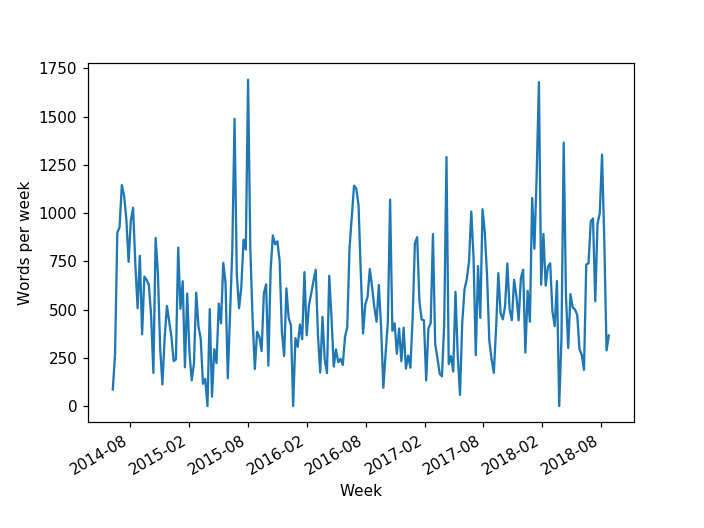

In [89]:
fig, ax = plt.subplots()
ax.plot(df['length'].resample("W").sum())
ax.set_ylabel("Words per week")
ax.set_xlabel("Week")
fig.autofmt_xdate()
fig.show()

<IPython.core.display.Javascript object>


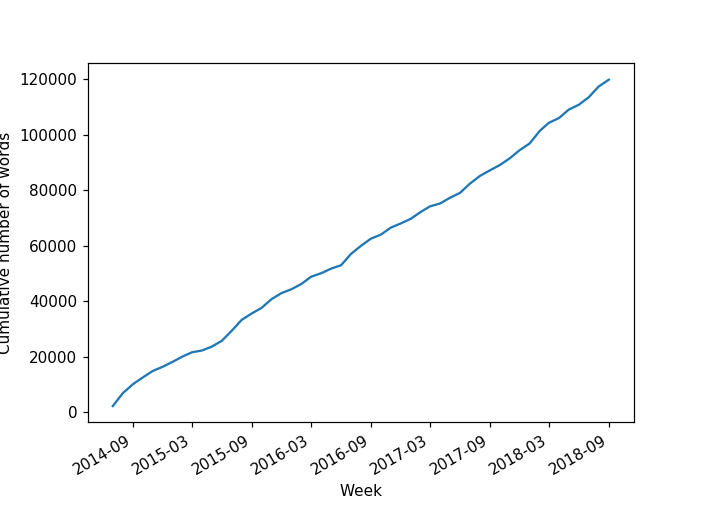

In [99]:
fig, ax = plt.subplots()
ax.plot(df['length'].resample("M").sum().cumsum())
ax.set_ylabel("Cumulative number of words")
ax.set_xlabel("Week")
fig.autofmt_xdate()
fig.show()

## Word counts and cloud 

In [158]:
mystopwords = [",", "!", ".", ";", "-", "'", "'s", 
               "''", "...", "'re", ":", "``", "(", "?", 
               ")", "n't", "'ve", "'m", "ca", "like", "'ll", "'d", "wo", "ta"] + stopwords.words("english")

In [175]:
words = []
for _, poem in poems.items():
    words += [word.lower() for word in word_tokenize("\n".join(poem.body)) if word.lower() not in mystopwords]
counts = dict(Counter(words))

<IPython.core.display.Javascript object>


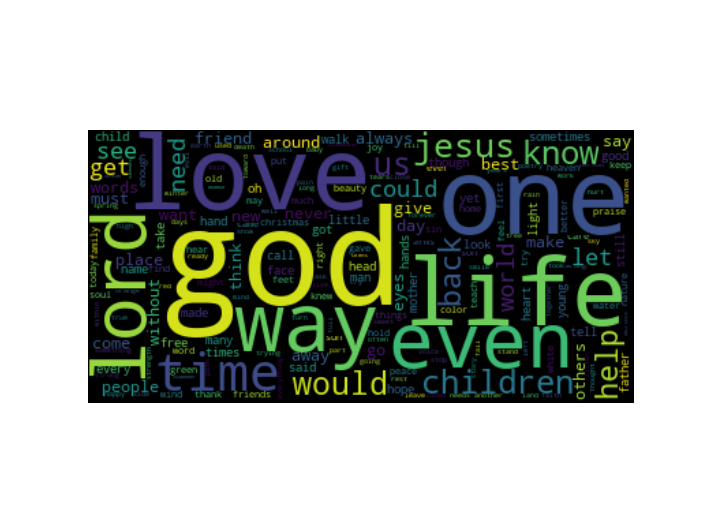

In [182]:
wordcloud = WordCloud().generate_from_frequencies(counts)
fig, ax = plt.subplots()
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
fig.show()